In [1]:
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
from graph import draw
import numpy as np
df = pd.read_pickle('../data/raw/swedish_stocks')
tickers = df.columns.get_level_values(0).unique()
df.columns.get_level_values(1).unique()
df.index = pd.to_datetime(df.index).strftime("%Y-%m-%d")

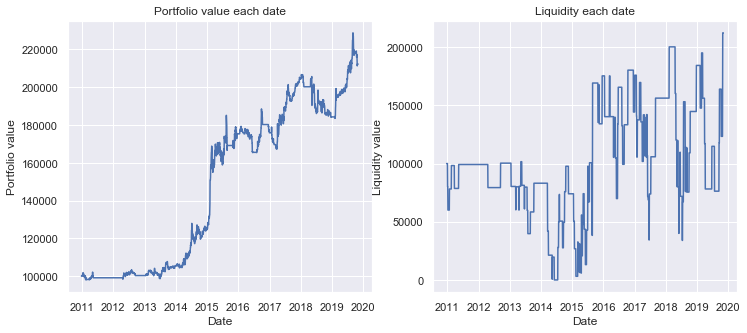

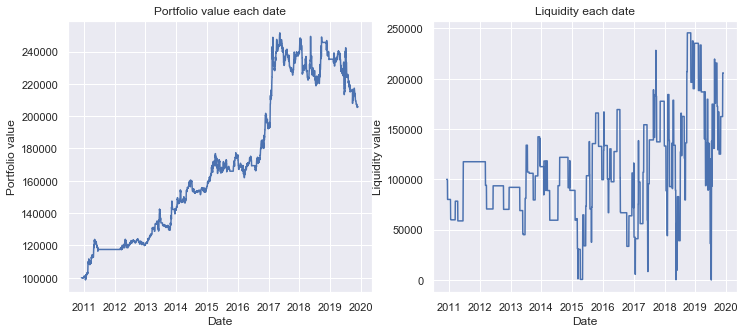

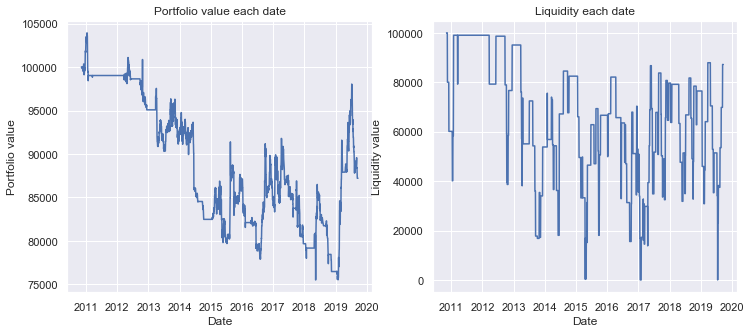

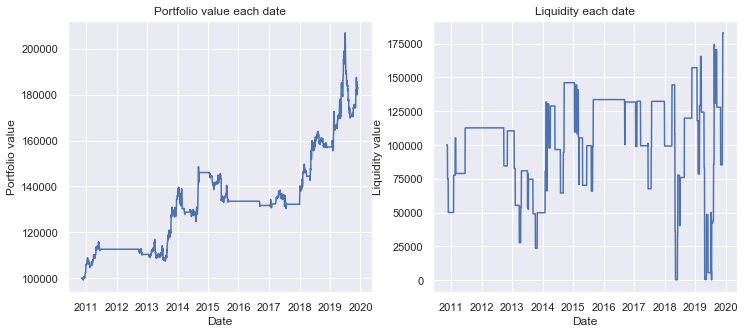

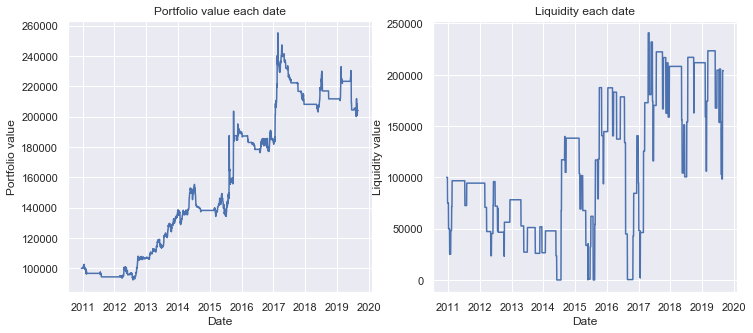

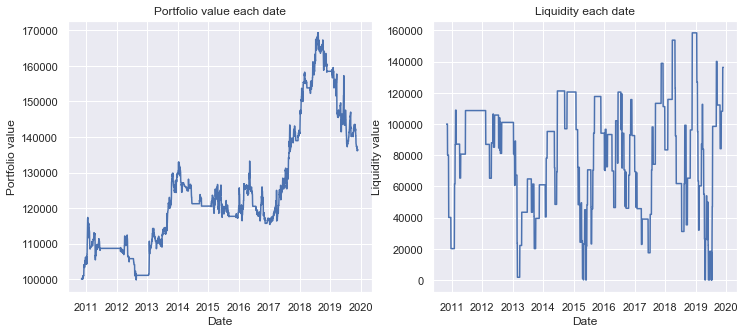

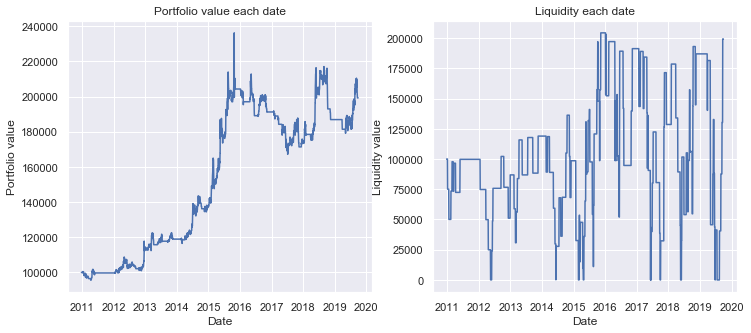

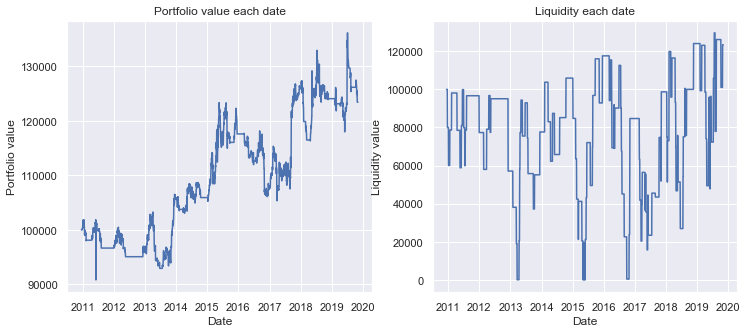

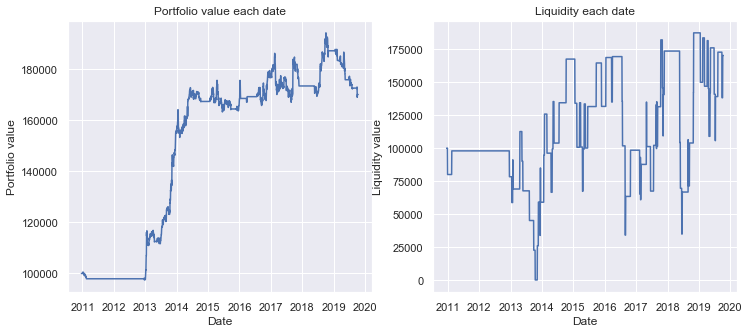

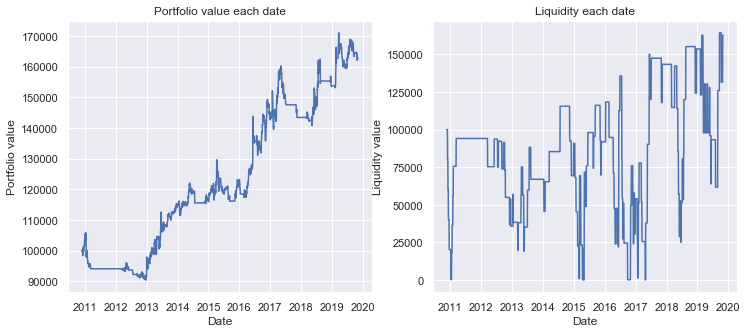

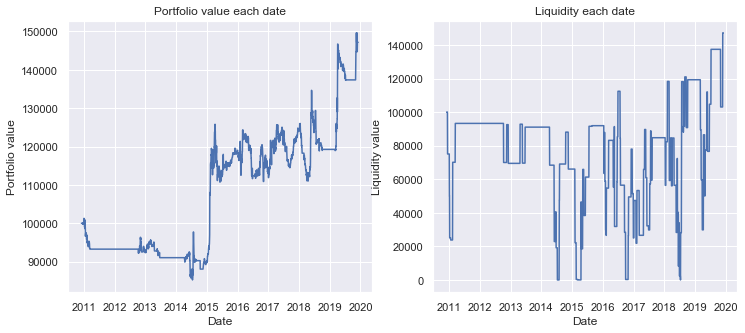

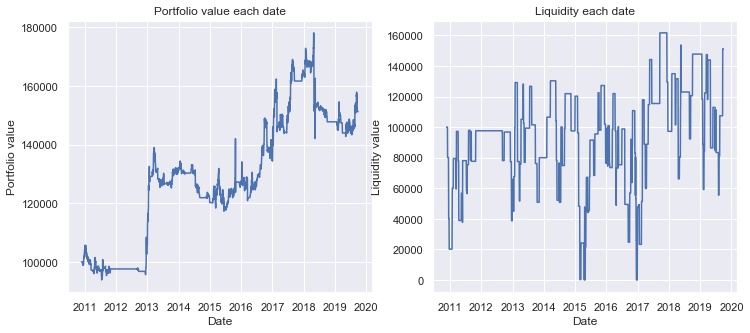

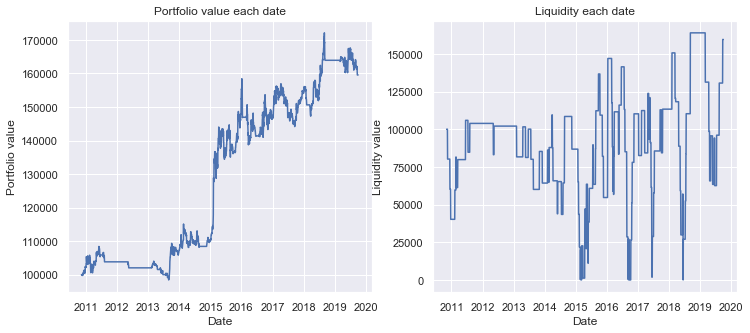

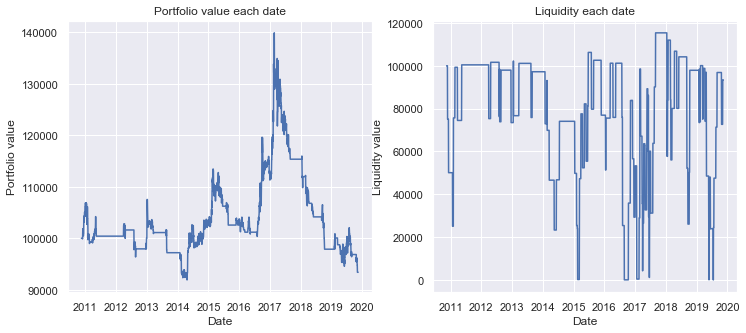

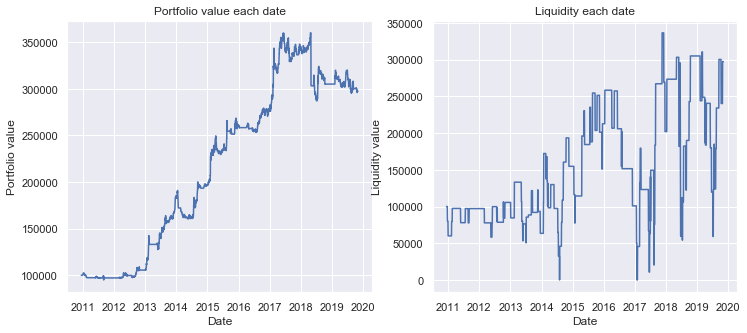

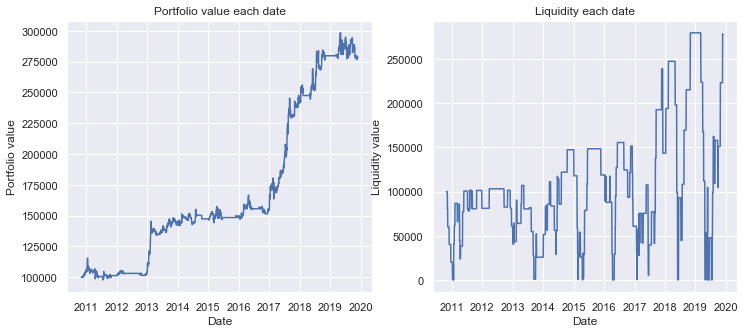

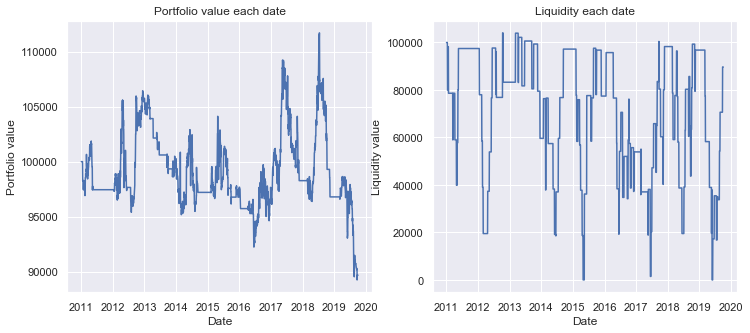

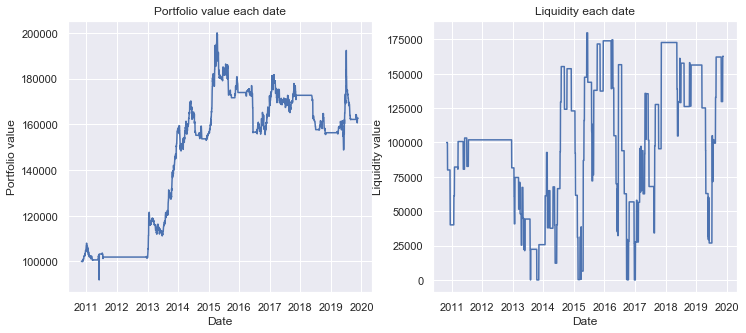

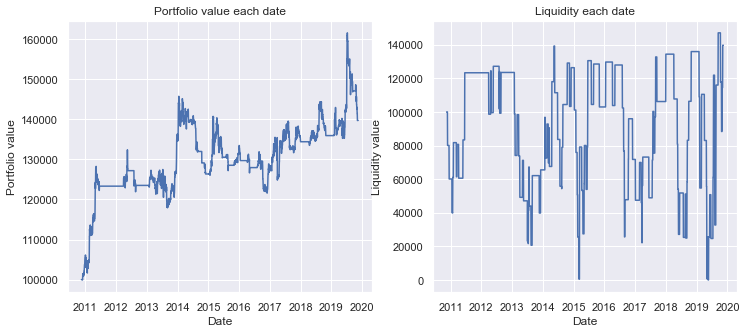

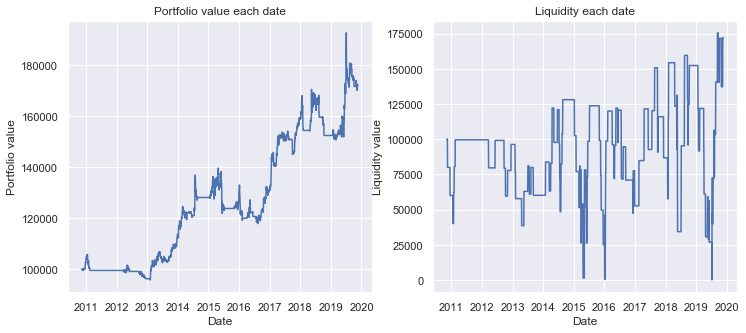

Wall time: 2h 25s


In [10]:
%%time
import datetime
import pandas as pd
import numpy as np
from imp import reload
import src.helpers as helpers
reload(helpers)
import src.helpers as helpers
import src.strats as strats
reload(strats)
import src.strats as strats
import glob

import dask
dask.config.set(scheduler='processes')


path = r'../data/clean/swe_equ' # use your path
allfiles = glob.glob(path + "/*.csv")

def get_signal_data(file_name):
    data = pd.read_csv(file_name, parse_dates=['Date'], index_col=['Date'])
    return strats.data_momentum(data)

worker_delayed = dask.delayed(get_signal_data)
money_dfs = []
for i in range(20):
    allfiles_changed = np.random.choice(allfiles, 50, replace=False)
    allpromises = [(worker_delayed(fn), fn[len(path)+1:-4]) for fn in allfiles_changed]

    all_dfs = dask.compute(allpromises)

    trade_df = helpers.get_trade_df(all_dfs[0])

    money_df, portfolio_df = strats.plot_trades(trade_df.copy())
    money_dfs.append(money_df)
#result = strats.evaluate_strat(trade_df)
#strats.print_evaluation(result)

(274012.18902820616, 63540.71097179383, 168776.45)

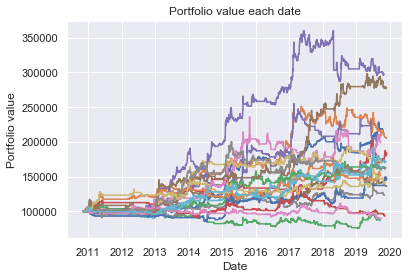

In [11]:
import matplotlib.pyplot as plt
plt.title('Portfolio value each date')
plt.xlabel('Date')
plt.ylabel('Portfolio value')
final_port_value = []
series_port_values = []
for money_d in money_dfs:
    plt.plot(money_d.index, money_d.portfolio_value)
    final_port_value.append(int(money_d.portfolio_value.values[-1]))
    series_port_values.append(money_d.portfolio_value)
    
mean = np.asarray(final_port_value).mean()
ci_upper = np.asarray(final_port_value).mean() + 1.96 * np.asarray(final_port_value).std()
ci_lower = np.asarray(final_port_value).mean() - 1.96 * np.asarray(final_port_value).std()
ci_upper, ci_lower, mean

In [20]:
#pd.concat(series_port_values, ignore_index=True, join='outer', axis=1).ffill().bfill().to_csv('bootstrap_sims_new.csv')
big_df.to_csv('bootstrap_sims_1.1.csv')

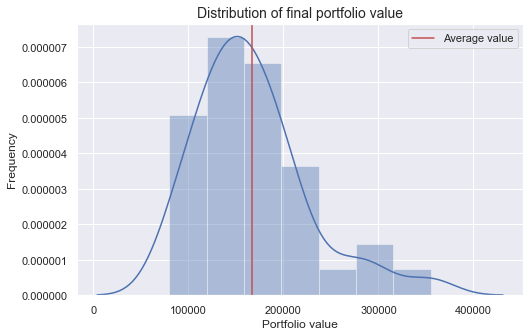

166436.59371428573

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

bootstrap_df = pd.read_csv('bootstrap_sims.csv', index_col=0)
big_df = pd.concat([bootstrap_df, pd.concat(series_port_values, ignore_index=True, join='outer', axis=1)], axis=1).astype(float).ffill()
plt.figure(figsize=(8,5))
ax = sns.distplot(big_df.iloc[-1], norm_hist=True)
plt.axvline(x=big_df.iloc[-1].mean(), color='r')
plt.legend(['Average value'])
plt.title('Distribution of final portfolio value', fontsize=14)
plt.xlabel('Portfolio value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('distribution_final_value.png')
plt.show()
big_df.iloc[-1].mean()  

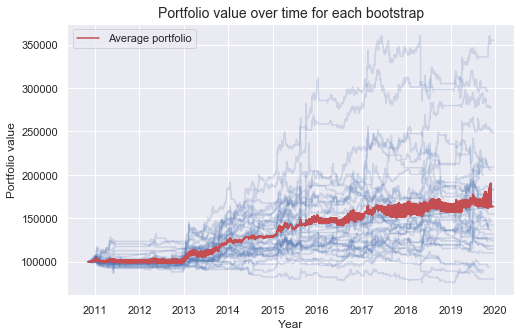

In [143]:
plt.figure(figsize=(8,5))
big_df = pd.concat([bootstrap_df, pd.concat(series_port_values, ignore_index=True, join='outer', axis=1)], axis=1).astype(float)
big_df.index = pd.to_datetime(big_df.index)
big_df['mean_value'] = big_df.mean(axis=1)
for (columnName, columnData) in big_df.iteritems():
    plt.plot(columnData, color='b', alpha=0.2)
plt.plot(big_df.sort_index().mean_value, color='r', label='Average portfolio')
plt.title('Portfolio value over time for each bootstrap', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Portfolio value', fontsize=12)
plt.legend()
#plt.savefig('port_value_time.png')

In [180]:
#big_df['year'] = big_df.index.year
#big_df = big_df. .groupby('year').last()
r = np.log(big_df.groupby('year').last().mean_value).diff().dropna()
r.mean()*np.sqrt(252), r.std(), r.mean()/r.std()

(0.8315310208198953, 0.0745942658566889, 0.7022192668241448)

In [186]:
((big_df.mean_value.iloc[-1])/100000) ** (1/9), r.std(), (((big_df.mean_value.iloc[-1])/100000) ** (1/9) - 1) / r.std()

(1.0572622265376812, 0.0745942658566889, 0.767649173566422)

In [49]:
import src.strats as strats
reload(strats)
import src.strats as strats
import src.helpers as helpers
reload(helpers)
import src.helpers as helpers
import matplotlib.pyplot as plt
money_df.portfolio_value.std()

23746.751491788138

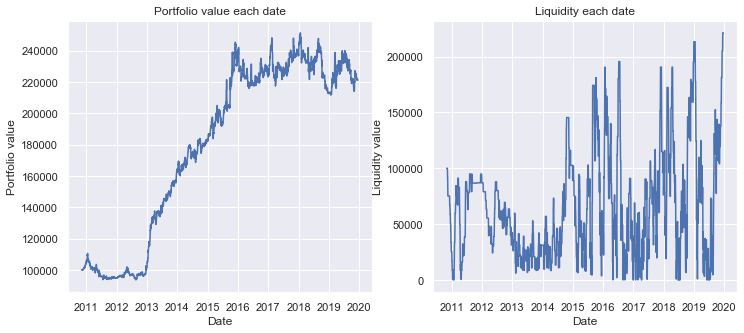

Evaluation of strategy
Gain: 121304.1 kr 
Avg gain: 245.1 kr/trade
    Total gain: 502618.9
    Total loss: -381314.9
Num trades: 495
    Num pos trades: 187
    Num neg trades: 308
Buy and hold would result in gain: 0
    Buy and hold vs gain: 0


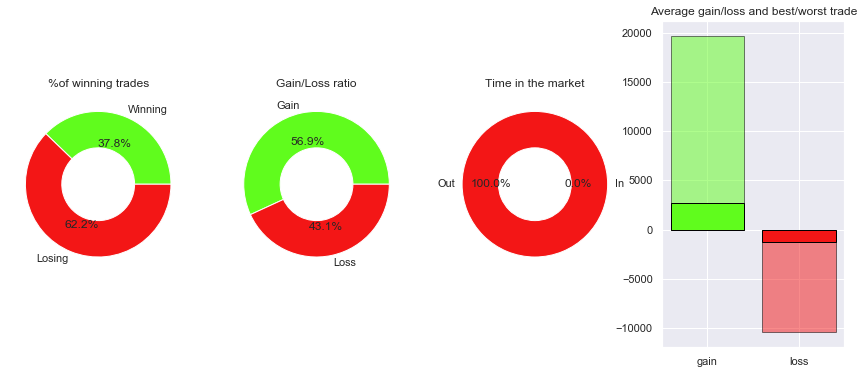

(                    Close  signal  nr_active_trades
 Date       ticker                                  
 2010-11-12 ATCO-B   65.97     1.0               1.0
 2010-11-15 ENDO    220.14     1.0               2.0
 2010-11-16 ADDT-B   28.92     1.0               1.0
 2010-12-08 GUNN     34.63     1.0               4.0
 2010-12-13 BOL      99.85     1.0               3.0
 ...                   ...     ...               ...
 2019-11-21 HM-B    181.60    -1.0               1.0
            PLUN      3.44     1.0               2.0
 2019-11-25 SAXG      0.18    -1.0               2.0
 2019-12-03 STRAX     3.12    -1.0               2.0
 2019-12-11 PLUN      3.18    -1.0               1.0
 
 [990 rows x 3 columns],
             portfolio_value  liquidity  positions_value
 2010-11-02        100000.00  100000.00              0.0
 2010-11-03        100000.00  100000.00              0.0
 2010-11-04        100000.00  100000.00              0.0
 2010-11-05        100000.00  100000.00              0.0

In [382]:
trade_df, money_df, result = helpers.evaluate_saved_trades('trade_df.csv')

In [ ]:
"""
buy and hold result :0.7037333584734126
time: 0.06822561321088255
pos trades: 0.34623352165725046
gain: 0.6400944323653949

buy and hold result :0.5786866429997507
time: 0.056960157634874
pos trades: 0.3836477987421384
gain: 0.7164008660191196



buy and hold result :0.4371523210261126
time: 0.049797094542969954
pos trades: 0.3772686433063792
gain: 0.7422033305409389
mean gain: 1103.5520000000001

MA_DIFF = df['ma200'][0] * 0.06
    
MA20_STRENGTH = 0.26
MA50_STRENGTH = 0.2
MA200_STRENGTH = -0.1
ATR_STRENGTH = 0.3

STOP_LOSS_LEVEL = .925
"""

import talib
from imp import reload
import helpers
reload(helpers)
import helpers
import strats
reload(strats)
import strats
import graph
reload(graph)
import graph
#import seaborn as sns; sns.set()
import glob
import pandas as pd

import matplotlib.pyplot as plt
indices = data[data['signal'] != 0].index
rolling_len = 20
for i in indices:
    signal_data = data[(data.index <= i) & (data.index > i - rolling_len)]
    
    price_slope = helpers.calc_rsi_trend(signal_data.Close)
    ma50_slope = helpers.calc_slope(signal_data['ma50'])
    ma200_slope = helpers.calc_rsi_trend(signal_data['ma200'])
    
    rsi_slope = helpers.calc_rsi_trend(signal_data['rsi'])

    rsi_uptrend, rsi_downtrend = helpers.calc_rsi_trend(signal_data.rsi)
    
    plt.figure(figsize=(15,6))
    print(str(signal_data['signal'].values[-1]))
    plt.subplot(1,3,1)
    plt.title('Close ' + str(price_slope))
    signal_data['ma50'].plot()
    signal_data['ma200'].plot()
    signal_data['Close'].plot()
    plt.legend()
    plt.subplot(1,3,2)
    plt.title('ma50 ' + str(ma50_slope))
    signal_data['ma50'].plot()
    plt.subplot(1,3,3)
    #plt.title(max_slope, min_slope)
    plt.title('rsi - up: ' + str(rsi_uptrend) + ' - down: ' + str(rsi_downtrend) + ' -- Slope: ' + str(rsi_slope))
    signal_data['rsi'].plot()
    plt.show()

In [39]:
equ = pd.read_csv('../data/clean/swe_equ/HM-B.csv', parse_dates=['Date'], index_col=['Date']).iloc[0:100,:]
from imp import reload
import strats
reload(strats)
from strats import pattern_strat
import helpers
from statsmodels.nonparametric.kernel_regression import KernelReg
reload(helpers)
import helpers
equ.index = np.linspace(1., len(equ), len(equ))
min_max = helpers.find_max_min(equ.Close)
kr = KernelReg([equ.Close.values], [equ.Close.index.values], var_type='c', bw=[1.8])
f = kr.fit([equ.index.values])
smooth_prices = pd.Series(data=f[0], index=equ.Close.index)
#c = nibe.Close.copy()
#c.index = np.linspace(1., len(c), len(c))
#print(c.values.shape, c.index.values.shape)
plt.figure(figsize=(15,6))
plt.plot(equ.Close)
plt.plot(smooth_prices)
plt.scatter(x=min_max.index, y=min_max.values)
plt.scatter(x=[21,38, 518,540], y=[5,5,5,5])
pattern_strat(min_max)
print(min_max)

NameError: name 'np' is not defined

In [9]:
import trendln
# this will serve as an example for security or index closing prices, or low and high prices
import yfinance as yf # requires yfinance - pip install yfinance
tick = yf.Ticker('^GSPC') # S&P500
hist = tick.history(period="max", rounding=True)
h = hist[-100:].Close
mins, maxs = trendln.calc_support_resistance(h)
minimaIdxs, pmin, mintrend, minwindows = trendln.calc_support_resistance((hist[-1000:].Low, None)) #support only
mins, maxs = trendln.calc_support_resistance((hist[-1000:].Low, hist[-1000:].High))
(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs

In [265]:
equ = pd.read_csv('../data/clean/swe_equ/TELIA.csv', parse_dates=['Date'], index_col=['Date'])#.iloc[0:100,:]

nan -0.03589430894308913 nan


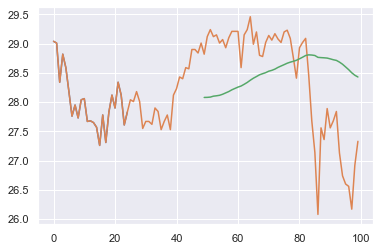

0.1404261335224432 -0.03589430894308913 27.729974415841593


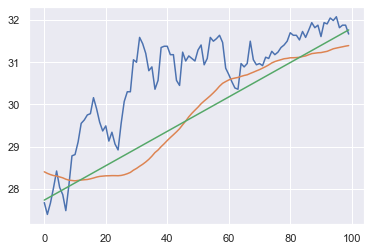

-0.02088365034850676 -0.03589430894308913 32.03261829702973


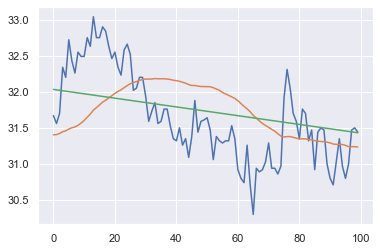

-0.10279580437382489 -0.03589430894308913 31.75773912871287


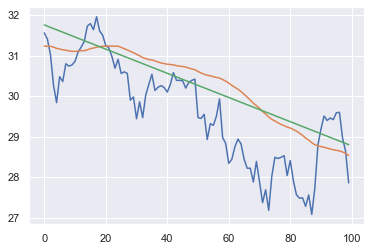

-0.01502487438826552 -0.03589430894308913 27.802663564356447


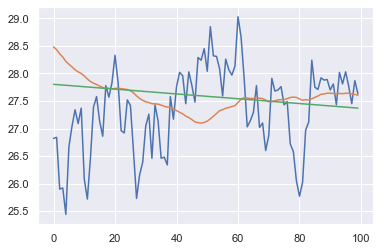

0.051585968514206236 -0.03589430894308913 27.499006019801993


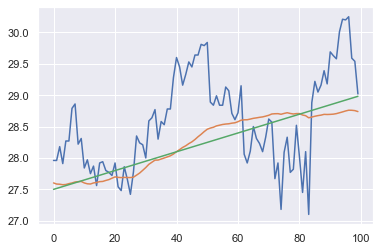

0.06199384814514482 -0.03589430894308913 28.334292831683182


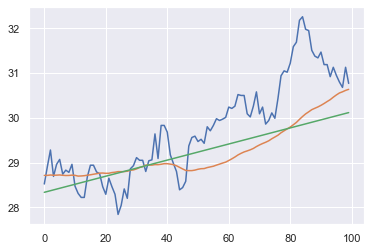

-0.059896820260539205 -0.03589430894308913 30.498038811881216


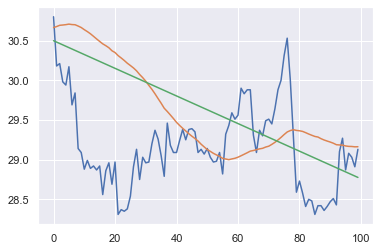

0.08845539512628924 -0.03589430894308913 28.992525386138638


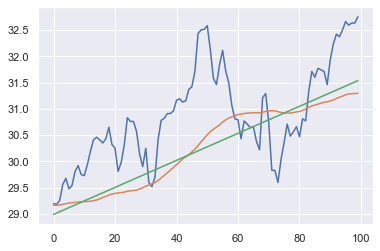

0.19617415047289824 -0.03589430894308913 30.907549821782197


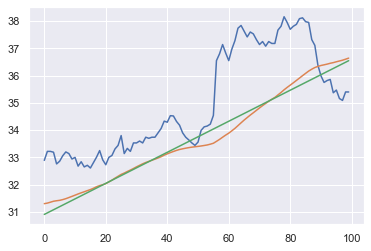

In [310]:
equ1 = equ.iloc[:25,:]
from scipy.stats import linregress
plt.plot(np.arange(len(equ1.Close)), equ1.Close.values)
mins, maxs = trendln.calc_support_resistance(equ1.Close)
#plt.plot(np.arange(len(equ1.Close)), mins[1][1] + mins[1][0] * np.arange(len(equ1.Close)))
equ['ma50'] = talib.SMA(equ.Close, timeperiod=50)
for i in range(10):
    equ1 = equ.iloc[100*i:(i+1)*100,:]
    plt.plot(np.arange(len(equ1.Close)), equ1.Close.values)
    plt.plot(np.arange(len(equ1.Close)), equ1.ma50.values)
    ma50_slope, intersept, _, _, _ = linregress(np.arange(len(equ1.Close)), equ1.ma50.values)
    plt.plot(np.arange(len(equ1.Close)), intersept + ma50_slope * np.arange(len(equ1.Close)))
    print(ma50_slope/equ.Close[0]*100, mins[1][0], intersept)

    
    plt.show()

no no 6.001008762811859 4.61878590352849


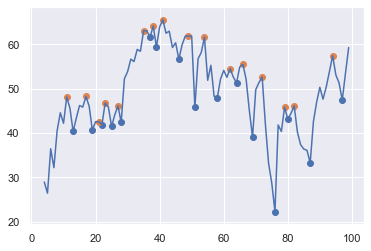

no no -7.946654893025697 2.8748860093020467


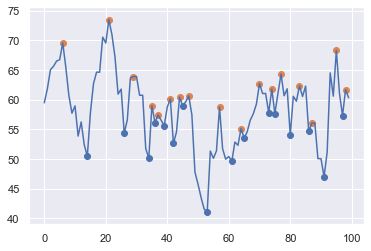

no short -16.426386065183078 -18.48407600843979


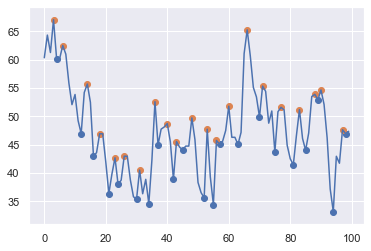

no short -12.004021694241699 -20.615937215220544


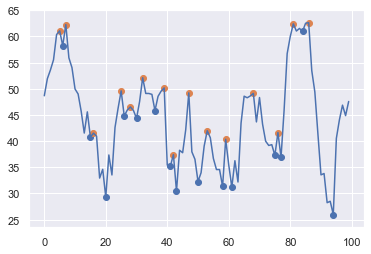

no no 3.7609460373488397 11.55001675234766


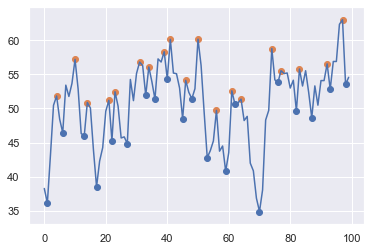

no no 4.557983086468598 1.7767373980127166


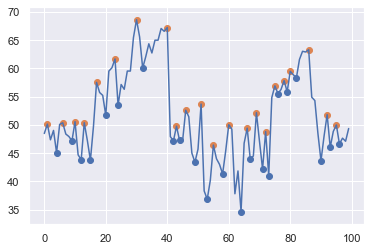

no no 7.804993178538216 7.704883580579571


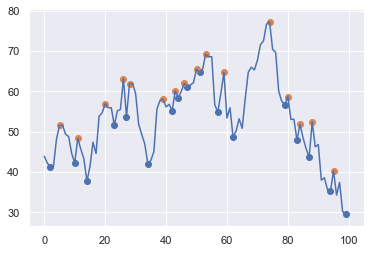

long no 20.795355428255426 14.890578388848871


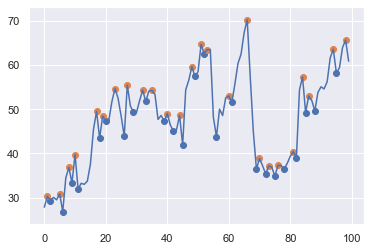

no short -9.348786987536 -17.502784961148958


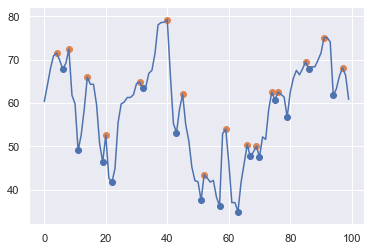

no no 3.150129511517572 2.3152777745194184


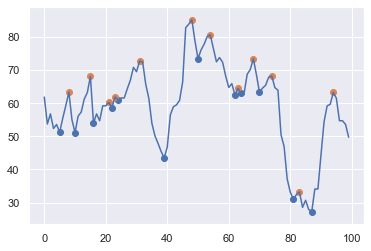

In [311]:
for i in range(10):
    equ1 = equ.iloc[10+100*i:10+(i+1)*100,:]
    minimaIdxs, maximaIdxs = trendln.get_extrema(equ1.rsi)
    plt.plot(np.arange(len(equ1.rsi)),equ1['rsi'])
    min_values = equ1.rsi[minimaIdxs]
    max_values = equ1.rsi[maximaIdxs]
    plt.scatter(minimaIdxs, min_values)
    plt.scatter(maximaIdxs, max_values)
    mins = (np.asarray(min_values[1:]) - min_values[0]).mean()
    maxs = (np.asarray(max_values[1:]) - max_values[0]).mean()
    res1 = 'long' if mins > 15 or maxs > 15 else 'no'
    res2 = 'short' if mins < -15 or maxs < -15 else 'no'
    print(res1, res2, maxs, mins)
    plt.show()

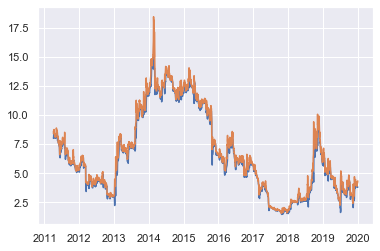

In [175]:
plt.plot(data['bol_lower'])

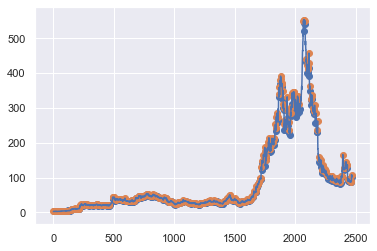

In [149]:
equ1 = equ.iloc[:,:]
minimaIdxs, maximaIdxs = trendln.get_extrema(equ1.Close)
equ1.Close[minimaIdxs]
plt.plot(range(len(equ1.Close)), equ1.Close)
plt.scatter(minimaIdxs, equ1.Close[minimaIdxs])
plt.scatter(maximaIdxs, equ1.Close[maximaIdxs])

In [136]:
movement = equ1.Close.max() - equ1.Close.min()
min_result = 0
for i in range(0,equ1.Close[minimaIdxs].shape[0]-1):
    diff = -(equ1.Close[minimaIdxs][i] - equ1.Close[minimaIdxs][i+1])
    min_result += diff
max_result = 0
for i in range(0,equ1.Close[maximaIdxs].shape[0]-1):
    diff = -(equ1.Close[maximaIdxs][i] - equ1.Close[maximaIdxs][i+1])
    max_result += diff
print(max_result/movement, min_result/movement)

0.56478611283323 0.41971481711097336


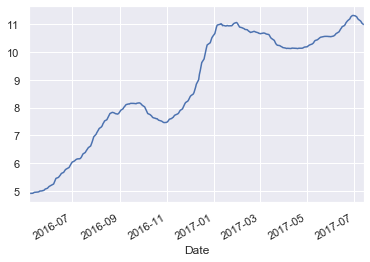

In [163]:
ma = data.ma20.dropna()
ma = ma.iloc[-500:-200]
ma.plot()

In [164]:
import helpers
reload(helpers)
import helpers
helpers.calc_slope(ma)

0.43055768562364194